In [3]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker()

# Define product names for each category
product_names = {
    'Electronics': ['Smartphone', 'Laptop', 'Tablet', 'Headphones', 'Camera'],
    'Clothing': ['T-shirt', 'Jeans', 'Jacket', 'Dress', 'Sneakers'],
    'Grocery': ['Milk', 'Bread', 'Eggs', 'Fruits', 'Vegetables'],
    'Furniture': ['Chair', 'Table', 'Sofa', 'Bed', 'Bookshelf'],
    'Sports': ['Football', 'Basketball', 'Tennis Racket', 'Golf Club', 'Yoga Mat'],
    'Books': ['Novel', 'Biography', 'Comics', 'Cookbook', 'Textbook']
}

# Define a list of specific domain names
ecommerce_domains = ['Amazon', 'Flipkart', 'Myntra', 'eBay', 'Meesho']

# Define a list of specific countries
countries = ['United States', 'India', 'Germany', 'Australia', 'Canada', 'Brazil']

def generate_data(num_records, rogue_probability=0.2):  # Increased rogue probability
    data = []
    for _ in range(num_records):
        # Select a random product category
        product_category = fake.random_element(elements=list(product_names.keys()))
        
        # Select a random product name from the chosen category
        product_name = fake.random_element(elements=product_names[product_category])
        
        # Determine payment success or failure
        payment_success = fake.random_element(elements=('Y', 'N'))
        
        # Create a standard record
        record = {
            'order_id': fake.uuid4(),
            'customer_id': fake.uuid4(),
            'customer_name': fake.name(),
            'product_id': fake.uuid4(),
            'product_name': product_name,
            'product_category': product_category,
            'payment_type': fake.random_element(elements=('card', 'Internet Banking', 'UPI', 'Wallet')),
            'qty': np.random.randint(1, 10),
            'price': round(np.random.uniform(10, 500), 2),
            'datetime': fake.date_time_this_decade(),
            'country': fake.random_element(elements=countries),  # Choose from specific countries
            'city': fake.city(),
            'ecommerce_website_name': fake.random_element(elements=ecommerce_domains),
            'payment_txn_id': fake.uuid4(),
            'payment_txn_success': payment_success,
            'failure_reason': fake.sentence() if payment_success == 'N' else None
        }
        
        # Introduce rogue records based on the probability
        if np.random.rand() < rogue_probability:
            # Apply multiple rogue changes to the record
            rogue_fields = fake.random_choices(elements=['qty', 'price', 'payment_type', 'country'], length=2)
            
            if 'qty' in rogue_fields:
                record['qty'] = np.random.choice([-1, 0, 1000])  # Invalid quantities
            if 'price' in rogue_fields:
                record['price'] = np.random.choice([-100, 0])  # Invalid prices
            if 'payment_type' in rogue_fields:
                record['payment_type'] = 'Unknown'  # Invalid payment type
            if 'country' in rogue_fields:
                record['country'] = 'Unknown'  # Invalid country
        
        data.append(record)
    
    return pd.DataFrame(data)

# Generate the data and save it to a CSV file
df = generate_data(10000)
df.to_csv('generated_data2.csv', index=False)


##Loading the Data

In [4]:
import pandas as pd

# Specify the file path
file_path = 'generated_data2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
0,d3b47002-e254-4669-8a50-57b4a49d96bf,7b327ef5-af31-487c-8dd3-8c7cfb279614,Adam Sanchez,f0e5e144-bf2d-43d3-98e3-fc46a77b0311,Jeans,Clothing,Wallet,1000,14.15,2023-06-04 18:30:02,Unknown,Collinsfort,eBay,c1e1800e-2753-445c-8d94-678ce59ca721,N,Hand exist from main.
1,8dd92f31-b706-4e4f-aca0-a10e75e77aea,65ea0e02-1a90-473b-9373-4180bd1a4b74,James Foster,96ee0ebe-98e0-4e70-b251-7046744d7e37,Tablet,Electronics,Internet Banking,5,396.50,2024-01-11 04:32:25,India,Arthurtown,eBay,2226c54a-9b6d-4e78-b753-ad041c64a045,Y,NaN
2,925919f4-0c96-4834-af79-1577b7425cfd,61736dc9-08bd-4a87-9571-bcb423f668f4,Kyle Kelly,79e47bdd-757e-418a-b634-ee2298759d41,Milk,Grocery,Internet Banking,1000,48.22,2024-05-03 00:57:40,Unknown,Port John,Meesho,3e685891-bd3f-4f5d-8c64-edb6119cffcb,N,Even card product why.
3,88581b76-1628-4ea0-b6f3-d0ffbce3d0f2,56cb7ba0-c2ca-4c33-bffc-bbcfc23697ae,Natalie Jones,e2095e6c-be33-4c5b-b570-542b8c8cf3f7,Football,Sports,card,1,431.11,2021-12-28 22:15:02,Germany,North Tina,eBay,00ba45fa-a179-4a8b-90c8-a962b12e05b6,Y,NaN
4,0bcaa949-11ed-41ae-b6f9-4cea342336ff,4075acfb-6dac-48c7-8e98-14525a755b01,Troy Lee,89e04226-c813-4af0-860d-6f76d9243a1b,Bed,Furniture,Unknown,1000,44.30,2022-07-04 06:34:24,Canada,South Javier,Myntra,f4e76026-a7a1-4c5b-b9f2-5ec6e3f58578,Y,NaN


Data Exploration

Summary of the DataFrame:


In [5]:
df.info()
#This provides a concise summary, including the number of non-null entries in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                10000 non-null  object 
 1   customer_id             10000 non-null  object 
 2   customer_name           10000 non-null  object 
 3   product_id              10000 non-null  object 
 4   product_name            10000 non-null  object 
 5   product_category        10000 non-null  object 
 6   payment_type            10000 non-null  object 
 7   qty                     10000 non-null  int64  
 8   price                   10000 non-null  float64
 9   datetime                10000 non-null  object 
 10  country                 10000 non-null  object 
 11  city                    10000 non-null  object 
 12  ecommerce_website_name  10000 non-null  object 
 13  payment_txn_id          10000 non-null  object 
 14  payment_txn_success     10000 non-null 

Checking for Missing Values:


In [6]:
df.isnull().sum()
#This reveals the total number of missing values per column

order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                 0
product_category             0
payment_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            5049
dtype: int64

Unique Values Exploration

In [10]:
df.nunique()
#This shows the number of unique values per column.

order_id                  10000
customer_id               10000
customer_name              9379
product_id                10000
product_name                 30
product_category              6
payment_type                  5
qty                          12
price                      8346
datetime                   9999
country                       7
city                       7678
ecommerce_website_name        5
payment_txn_id            10000
payment_txn_success           2
failure_reason             4951
dtype: int64

 Detecting Rogue Values

In [11]:
#Identifying Rogue Quantities:
df[df['qty'] <= 0]

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
13,bdeeeaaf-fe7b-4dc5-811a-9bfc95a7740c,76e23d66-b831-46a3-936a-5febbb99e287,Amanda Donaldson,33df8370-0093-4764-8e73-4acb35397670,Basketball,Sports,Internet Banking,0,187.47,2023-01-11 18:49:10,Unknown,Lake Marieburgh,Meesho,aa4e8975-1d21-4453-9708-900c50781385,N,Get media writer hot serve early.
15,68db41da-d0cc-4d12-b930-9ca52946649e,be728723-1b15-4319-8dda-bd0b3c8cbc0c,Cindy Mcintyre,fac631c3-214e-4c0a-ab17-ed54a4d48565,Comics,Books,Unknown,0,14.26,2022-01-09 05:32:06,United States,South Alyssa,Meesho,31bb5e3b-d7e0-446d-8990-47f8fcf7cae7,Y,NaN
23,0c6e2881-6b28-4b98-ba96-4ff871d518e6,41eb7b57-5f2a-4a6a-b70f-bb7cd3217aae,Carlos Anderson,4c5ed8f5-d420-426b-a952-cd32139451bc,Textbook,Books,Wallet,0,0.00,2023-08-18 20:50:08,Germany,Barnesberg,Myntra,8553a2a2-f36d-4da7-b2d4-e24eb62383e6,N,Fact car board skill.
24,b8002665-f1c5-48d0-9cfd-5287503240d0,17e85c38-20ba-49ee-a42c-b9fc9b682a00,Caroline Johnson,01214368-f043-4670-9c18-e2233dd8ea85,Biography,Books,card,0,0.00,2020-06-20 06:01:16,Australia,West Shariville,Meesho,fb8eb96b-3d69-49c0-bb55-d211f74e265e,Y,NaN
27,bcec7238-d854-4b0d-b8a4-98df934f8e6c,a6e94109-6706-4d16-a7d0-4a79fdcdf265,Jennifer Rogers,31670ba8-84bb-467a-8c5c-bcdb7b18111e,Jacket,Clothing,Wallet,0,435.59,2023-01-21 15:22:03,Unknown,New Jasmine,Myntra,231136cd-2e6d-4ab2-8e88-867165e98fb9,N,Price own need stage lead.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,d10e6b21-5c58-40fa-816b-1e7b38ca02cb,afe941de-2c43-4b2b-9a04-116b54031b2b,Kelsey Zimmerman,0cb77597-431e-4633-9545-b61ea2113681,Tennis Racket,Sports,Wallet,0,225.75,2020-05-19 16:24:36,Unknown,South Thomas,Myntra,378aa39c-e974-4ea1-8cf0-958ae353b313,Y,NaN
9964,12689b7a-f5b4-400c-9d8d-1b0ed34c48c9,a1f629fc-7bc5-49f8-be22-0366b12b1095,Ian Delgado,29d818e5-9c7b-422d-b25f-eeea7689a075,Cookbook,Books,Internet Banking,0,0.00,2022-05-07 20:57:08,Australia,East Shaunmouth,Amazon,16b533c7-5555-445c-a529-66bdadcd56ec,N,Way remember return keep.
9970,000c36ae-5fb1-4200-ad1a-052d75b5ad94,c2019008-c6f9-46b8-9022-0159590ef858,Thomas Gonzalez,499a09c7-cdde-426f-abee-6f746bb3ec33,Golf Club,Sports,Wallet,-1,292.38,2024-05-30 06:29:24,Unknown,Summersview,Myntra,6e902818-f775-46ca-898c-3804739c2fea,Y,NaN
9987,7dae6047-5783-47fb-9733-a4eb5464fc0b,0064e715-b762-4442-abb1-f00ec9c7e48e,Matthew Edwards,8e3fe43a-9b21-4ecf-855f-fbf2b33498c3,Dress,Clothing,card,-1,371.51,2020-04-04 12:00:54,Unknown,North Kelly,Myntra,e389c5d2-a9f1-489c-9dac-02a5ee376961,N,To theory major more week consumer raise reality.


In [9]:
#Identifying Rogue Quantities:
df[df['qty'] > 100]
#This helps in spotting records where the quantity is either negative, zero, or unusually high.

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
0,d3b47002-e254-4669-8a50-57b4a49d96bf,7b327ef5-af31-487c-8dd3-8c7cfb279614,Adam Sanchez,f0e5e144-bf2d-43d3-98e3-fc46a77b0311,Jeans,Clothing,Wallet,1000,14.15,2023-06-04 18:30:02,Unknown,Collinsfort,eBay,c1e1800e-2753-445c-8d94-678ce59ca721,N,Hand exist from main.
2,925919f4-0c96-4834-af79-1577b7425cfd,61736dc9-08bd-4a87-9571-bcb423f668f4,Kyle Kelly,79e47bdd-757e-418a-b634-ee2298759d41,Milk,Grocery,Internet Banking,1000,48.22,2024-05-03 00:57:40,Unknown,Port John,Meesho,3e685891-bd3f-4f5d-8c64-edb6119cffcb,N,Even card product why.
4,0bcaa949-11ed-41ae-b6f9-4cea342336ff,4075acfb-6dac-48c7-8e98-14525a755b01,Troy Lee,89e04226-c813-4af0-860d-6f76d9243a1b,Bed,Furniture,Unknown,1000,44.30,2022-07-04 06:34:24,Canada,South Javier,Myntra,f4e76026-a7a1-4c5b-b9f2-5ec6e3f58578,Y,NaN
5,b4bc6b1b-afd1-44ed-9966-fb1974fa1637,4df33bd7-6123-455d-b98e-3b6cef5232ac,Johnny Campbell,14ce5ead-b1ec-4c06-b37c-8a7918d80b12,Vegetables,Grocery,Unknown,1000,133.82,2022-07-15 07:21:02,Brazil,New Bailey,Myntra,defe96c1-d055-4faa-8781-de3bb9caa486,Y,NaN
9,bc48f9d2-0ce7-4f6c-b6b2-03b8ec5efe20,52c1745c-166c-4a9c-af77-777decc5d15d,Mr. Jacob Williams,43da6c2a-7470-4bc9-a6a3-f1d7dc4b59b7,Textbook,Books,Wallet,1000,0.00,2020-01-20 10:29:31,Australia,Michelleborough,Flipkart,de6c0c68-5291-4303-ba33-e2a8d7a44c2d,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,29be223f-dec3-425a-8b87-bbf8cb1e7dfb,722877b6-3378-4370-9e23-8177c61d9956,Trevor Boyd,7adae304-4d55-47a5-93fe-112f976b3fc4,Bed,Furniture,Wallet,1000,434.69,2020-05-08 12:31:59,Germany,Johnton,Myntra,8816c00d-f98f-4af4-a2a3-dc4783a8837f,Y,NaN
9874,1cb30cb9-9360-4c56-96fd-f59c076fa190,00866166-035a-455b-a2c1-e65f1baaa3c9,Laura Park,57e921de-5e1e-4be6-b401-7f4f8495f722,Textbook,Books,Internet Banking,1000,371.46,2024-01-15 03:40:30,United States,Shermanstad,Myntra,a99194e4-3cf1-4149-b497-6dae2e779ded,Y,NaN
9927,373c9fe2-c0ba-4a4d-8418-0f1ce2c91b03,1e3d6e51-0063-4170-ae0f-0af41c15a4d0,Carla Walter,32aaf956-ef76-4c78-9173-c0bf03c1b510,Laptop,Electronics,Internet Banking,1000,475.70,2021-03-07 23:15:31,Unknown,Bryanberg,Amazon,db39765b-76e4-48d3-9f15-ca5bdb8b4040,Y,NaN
9929,b0a3f286-b164-4756-96ef-3bacfe468cdf,1add36f7-9f78-4a25-9dcd-4bda346e669e,Margaret Strong,9c495aa4-89fb-47ed-a468-56d4a7323a83,Football,Sports,Wallet,1000,339.82,2023-07-16 01:21:29,Canada,South Steven,eBay,a2b2ad90-aa01-401c-a5bf-c048c5968c21,Y,NaN


Identifying Rogue Prices

In [9]:
df[df['price'] <= 0]
#This finds records where the price is either zero or negative.

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
2,529fc4d9-ede0-43ed-be46-26eccd892ceb,1abba9ac-1ba1-42ad-9a01-ec06b361dd5f,Kevin Beck,1ad0a940-bcc9-4e4c-851e-889e0e4f5f0b,Laptop,Electronics,card,6,0.0,2022-07-15 15:19:38,Unknown,East Meghan,Myntra,7a5118cb-69f9-4ac5-bfc3-feb1f268b406,N,Sense material few trial force say.
10,f4fa9a0a-655c-4047-955a-5266010ef4f0,7066dd01-d5ec-4ac8-b8a3-28c2307cc6a2,Laura Christensen,725fd267-b09d-4024-9e7d-58ccb93f1e70,Sneakers,Clothing,Unknown,8,0.0,2022-10-08 23:31:05,India,Murphystad,Meesho,414b8b35-15a1-4280-8604-e3b2957c71ac,Y,NaN
24,57c5ba5a-a15d-4947-8822-6bb9b82cf264,e7d4dca6-d7cb-416c-a8f1-9c5c1f38d767,Amanda Wagner,aa46cc13-8be3-498a-8765-f8665885d6ee,Dress,Clothing,Internet Banking,3,0.0,2023-07-29 08:48:46,Australia,West Phillip,Meesho,ccde2b7a-d275-4467-b714-8a87196511b6,Y,NaN
44,916b8272-8331-4164-8d67-61c62bbbab91,fb007968-f7d5-4fec-9edd-710d310650d5,Shannon Lewis,4c084577-5937-4c38-ab5f-ee9c8af9a784,Jacket,Clothing,UPI,1,0.0,2021-07-10 08:44:12,India,East Michaelville,Flipkart,015d1508-6d71-4288-b7b4-73b290e24e45,Y,NaN
46,3bcc01b4-def3-4c0a-9732-26612e66d6ee,b88f05d8-0acf-4b3f-8276-6d2af42aa6f6,Jessica Moore,a880f0bd-5f74-4232-9d0f-d9de3c03eb35,Vegetables,Grocery,Wallet,7,0.0,2021-06-17 17:41:24,Unknown,Carolborough,Myntra,87c5d4a4-f005-4453-8f14-9fe68e81c065,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,f6144380-8df7-42e9-afad-6c9075e6d830,7f55eab2-b3c0-47af-9941-6111579974ff,Jason Combs,bc8e4c08-633f-465f-8777-348faf3628fb,Comics,Books,Internet Banking,0,0.0,2020-07-04 08:45:43,Australia,New Michael,Meesho,eecaf81f-cc94-4864-826a-c42ff1bcbe9f,Y,NaN
9979,59c17867-9ccd-43a2-bf6a-8eb2240f8231,7e4d757e-5475-419c-9e3d-81839f1e7d94,James Cervantes,b1c8fe40-ca81-45e2-935a-af0adea8ee73,T-shirt,Clothing,Internet Banking,0,0.0,2021-05-08 15:37:53,Germany,Westshire,Amazon,6af5e53b-8433-4587-9658-3123484ff850,N,Media or month south middle.
9981,18a26601-50a0-4ded-900b-040699cac58c,2c026a75-3570-4444-862f-b2afec91a074,Ann Wagner,e80c7eee-ec84-42be-809b-74b6b73fe156,Chair,Furniture,Unknown,5,0.0,2022-05-03 08:01:05,India,Gregorybury,eBay,58843a79-0862-4642-b5ea-3a06e9a47794,N,Agreement PM energy.
9992,17857ab7-a3f2-4ced-b34c-0123dc877b69,00400383-699d-463c-8f28-f04af4234c15,David Green,1671106c-2752-426f-852b-11f983024d22,Yoga Mat,Sports,Unknown,1,0.0,2021-09-04 10:47:23,Canada,Brandonhaven,Myntra,aa9c4aea-3747-4ddd-83ab-9649cf8c733e,Y,NaN


Invalid Payment Types

In [12]:
df[df['payment_type'] == 'Unknown']

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
4,0bcaa949-11ed-41ae-b6f9-4cea342336ff,4075acfb-6dac-48c7-8e98-14525a755b01,Troy Lee,89e04226-c813-4af0-860d-6f76d9243a1b,Bed,Furniture,Unknown,1000,44.30,2022-07-04 06:34:24,Canada,South Javier,Myntra,f4e76026-a7a1-4c5b-b9f2-5ec6e3f58578,Y,NaN
5,b4bc6b1b-afd1-44ed-9966-fb1974fa1637,4df33bd7-6123-455d-b98e-3b6cef5232ac,Johnny Campbell,14ce5ead-b1ec-4c06-b37c-8a7918d80b12,Vegetables,Grocery,Unknown,1000,133.82,2022-07-15 07:21:02,Brazil,New Bailey,Myntra,defe96c1-d055-4faa-8781-de3bb9caa486,Y,NaN
15,68db41da-d0cc-4d12-b930-9ca52946649e,be728723-1b15-4319-8dda-bd0b3c8cbc0c,Cindy Mcintyre,fac631c3-214e-4c0a-ab17-ed54a4d48565,Comics,Books,Unknown,0,14.26,2022-01-09 05:32:06,United States,South Alyssa,Meesho,31bb5e3b-d7e0-446d-8990-47f8fcf7cae7,Y,NaN
28,b58b729e-9c96-4e21-a691-d4dbb5136060,a0e194e3-ef93-4d69-a8ac-d4f524c178e4,Kathleen Conrad,686544af-8516-4230-9e34-debe57f83ac5,Fruits,Grocery,Unknown,-1,14.57,2021-06-11 15:36:19,United States,New Daltonhaven,Flipkart,d430902f-d038-4258-941c-cc994cedd5bd,N,East sometimes drive including.
41,a651ff4f-58da-43e2-8d57-85fbc55cfb13,03a0e594-0a8f-42af-8b38-114082d94e9b,Brooke Horton,8b5fd4db-4d30-49dc-87cf-e39cdfedf1ee,Dress,Clothing,Unknown,6,68.44,2021-01-08 00:13:42,Unknown,Perrymouth,eBay,8844ab1e-0ac6-4254-938b-c9bac5ce718e,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,7bc6800e-470b-416d-9fe0-6748fb4bdd1e,a5c969ea-8488-481e-96e3-4e616d6dd157,Diane Hendricks,91a0e82c-09b9-43a5-becb-5599cc7e0d58,Basketball,Sports,Unknown,9,262.63,2024-08-01 11:10:24,Unknown,East Adrienne,Amazon,cbb0b8e2-266e-432a-b331-6f46ee00ce94,N,Magazine film wide decade.
9967,7a3e93a4-6053-4e42-ab8d-d91769115e52,fea563cf-3d43-45cf-94d8-9b47a6163ca7,Willie Lopez,71ff35d7-de13-4ef1-93b8-19a1a21a7159,Novel,Books,Unknown,5,495.62,2023-03-05 08:46:14,Australia,Benjaminton,Myntra,7cb91f74-1cc0-4751-8047-91f4f8322670,Y,NaN
9974,25fe9860-dd3e-41e4-9d2e-97716bf44c1a,364724bf-0f71-4c2a-8cd8-6373827bf80e,Mackenzie Wilson,c7bdf4f4-b600-4004-a63a-26c36ad8e4ab,Fruits,Grocery,Unknown,8,12.14,2020-12-14 16:19:50,Germany,Lake Danny,Flipkart,202027ab-2b55-4b33-9b72-e68a13529e78,Y,NaN
9983,8e861954-acde-4b10-b93d-07f9ed3fe00a,6826aad9-e875-41eb-b8ac-28a2f55c3e26,Alyssa Jones,2f075cd6-f600-4f86-ab91-3e0829b1549c,Biography,Books,Unknown,9,-100.00,2024-06-01 13:51:00,India,Port Elizabethside,eBay,97fa9e37-5fac-46cd-8d8d-8da9ba02b284,N,Friend wait look century home.


Invalid  Countries:

In [13]:
df[df['country'] == 'Unknown']

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
0,d3b47002-e254-4669-8a50-57b4a49d96bf,7b327ef5-af31-487c-8dd3-8c7cfb279614,Adam Sanchez,f0e5e144-bf2d-43d3-98e3-fc46a77b0311,Jeans,Clothing,Wallet,1000,14.15,2023-06-04 18:30:02,Unknown,Collinsfort,eBay,c1e1800e-2753-445c-8d94-678ce59ca721,N,Hand exist from main.
2,925919f4-0c96-4834-af79-1577b7425cfd,61736dc9-08bd-4a87-9571-bcb423f668f4,Kyle Kelly,79e47bdd-757e-418a-b634-ee2298759d41,Milk,Grocery,Internet Banking,1000,48.22,2024-05-03 00:57:40,Unknown,Port John,Meesho,3e685891-bd3f-4f5d-8c64-edb6119cffcb,N,Even card product why.
13,bdeeeaaf-fe7b-4dc5-811a-9bfc95a7740c,76e23d66-b831-46a3-936a-5febbb99e287,Amanda Donaldson,33df8370-0093-4764-8e73-4acb35397670,Basketball,Sports,Internet Banking,0,187.47,2023-01-11 18:49:10,Unknown,Lake Marieburgh,Meesho,aa4e8975-1d21-4453-9708-900c50781385,N,Get media writer hot serve early.
27,bcec7238-d854-4b0d-b8a4-98df934f8e6c,a6e94109-6706-4d16-a7d0-4a79fdcdf265,Jennifer Rogers,31670ba8-84bb-467a-8c5c-bcdb7b18111e,Jacket,Clothing,Wallet,0,435.59,2023-01-21 15:22:03,Unknown,New Jasmine,Myntra,231136cd-2e6d-4ab2-8e88-867165e98fb9,N,Price own need stage lead.
41,a651ff4f-58da-43e2-8d57-85fbc55cfb13,03a0e594-0a8f-42af-8b38-114082d94e9b,Brooke Horton,8b5fd4db-4d30-49dc-87cf-e39cdfedf1ee,Dress,Clothing,Unknown,6,68.44,2021-01-08 00:13:42,Unknown,Perrymouth,eBay,8844ab1e-0ac6-4254-938b-c9bac5ce718e,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,6a68052c-5ba0-4145-844f-1dc4cbc2a586,017fb0be-ac07-41c8-ac0f-543fce68cc64,Eric Jones,0565dbf4-faaa-4737-a86a-17d38b2eefbb,Football,Sports,Internet Banking,1,490.94,2021-03-03 16:49:36,Unknown,Johnstonton,Flipkart,b52a486a-98d8-402f-9296-8fca3982f490,Y,NaN
9956,33df0e24-cfde-4b4f-9f2a-71e988f4fc44,74e3fefb-4b8c-4a57-9b1e-902fbd8da240,Robert Rodriguez,b8b045cd-7817-4774-a32f-42d7df103eeb,Biography,Books,Wallet,3,479.17,2023-04-14 13:26:14,Unknown,Lake Kimberlystad,eBay,833fc187-19c1-4965-bd1b-e6a94276b326,Y,NaN
9960,f6f80112-d66c-485b-be0d-3c2c6fc25aa2,1c6851fb-8fc9-47f3-abda-b69e66b34282,Christopher Farley,dd4840c9-8e28-4679-a4bf-dd49c38cff4d,Jeans,Clothing,UPI,3,-100.00,2023-05-23 02:47:11,Unknown,Stephanieview,Flipkart,20cf56a5-fb53-4a64-9a32-85b5691efe8d,Y,NaN
9970,000c36ae-5fb1-4200-ad1a-052d75b5ad94,c2019008-c6f9-46b8-9022-0159590ef858,Thomas Gonzalez,499a09c7-cdde-426f-abee-6f746bb3ec33,Golf Club,Sports,Wallet,-1,292.38,2024-05-30 06:29:24,Unknown,Summersview,Myntra,6e902818-f775-46ca-898c-3804739c2fea,Y,NaN


In [14]:
df[df['country'] == 'Unknown'].shape[0]
#.shape[0]: Returns the number of rows in the filtered DataFrame, which is the count of rows where the country is 'Unknown'.

865

Checking for Duplicate Records

In [15]:
df.duplicated().sum()

np.int64(0)

Data cleaning

Handle Invalid Quantities

In [16]:
#Replace invalid quantities with a median or a valid default value
median_qty = df['qty'].median()
df['qty'] = df['qty'].apply(lambda x: median_qty if x <= 0 or x > 100 else x)

In [17]:
df['qty']

0       5.0
1       5.0
2       5.0
3       1.0
4       5.0
       ... 
9995    4.0
9996    3.0
9997    7.0
9998    8.0
9999    4.0
Name: qty, Length: 10000, dtype: float64

Handle Invalid Prices

In [18]:
#Replace invalid prices with the median or a valid default value
median_price = df['price'].median()
df['price'] = df['price'].apply(lambda x: median_price if x <= 0 else x)

In [19]:
df['price']

0        14.15
1       396.50
2        48.22
3       431.11
4        44.30
         ...  
9995    395.01
9996    364.91
9997    295.40
9998    268.51
9999    233.10
Name: price, Length: 10000, dtype: float64

Handle Invalid Payment Types

In [20]:
#Replace invalid payment types with the mode (most common value)
mode_payment_type = df['payment_type'].mode()[0]
df['payment_type'] = df['payment_type'].replace('Unknown', mode_payment_type)

In [21]:
df['payment_type']

0                 Wallet
1       Internet Banking
2       Internet Banking
3                   card
4                    UPI
              ...       
9995                 UPI
9996              Wallet
9997    Internet Banking
9998                 UPI
9999              Wallet
Name: payment_type, Length: 10000, dtype: object

Handle Invalid Country Names

In [22]:
#Replace invalid country names with the mode (most common value)
mode_country = df['country'].mode()[0]
df['country'] = df['country'].replace('Unknown', mode_country)

In [23]:
df[df['country'] == 'Unknown'].shape[0]

0

Handling Missing Values

In [24]:
# Fill missing values 
df['failure_reason'] = df['failure_reason'].fillna('No Failure')

In [25]:
df.to_csv('cleaned_data.csv', index=False)


Data Analysis

1. Top-Selling Category of Items (Overall and Per Country)

In [26]:
#Overall Top-Selling Category
top_category_overall = df.groupby('product_category')['qty'].sum().sort_values(ascending=False).reset_index()
print("Overall Top-Selling Category:")
print(top_category_overall.head(1))

Overall Top-Selling Category:
  product_category     qty
0            Books  8568.0


In [27]:
#op-Selling Category Per Country
top_category_per_country = df.groupby(['country', 'product_category'])['qty'].sum().reset_index()
top_category_per_country = top_category_per_country.sort_values(['country', 'qty'], ascending=[True, False]).drop_duplicates('country')
print("Top-Selling Category Per Country:")
print(top_category_per_country)


Top-Selling Category Per Country:
          country product_category     qty
4       Australia          Grocery  1376.0
9          Brazil        Furniture  1378.0
14         Canada      Electronics  2148.0
19        Germany         Clothing  1436.0
24          India            Books  1395.0
35  United States           Sports  1285.0


2. Popularity of Products Throughout the Year (Overall and Per Country)

In [28]:
#Overall Product Popularity Throughout the Year:
df['month'] = pd.to_datetime(df['datetime']).dt.month
product_popularity_overall = df.groupby(['month', 'product_category'])['qty'].sum().unstack().fillna(0)
print("Product Popularity Throughout the Year (Overall):")
print(product_popularity_overall)


Product Popularity Throughout the Year (Overall):
product_category  Books  Clothing  Electronics  Furniture  Grocery  Sports
month                                                                     
1                 895.0     749.0        716.0      772.0    734.0   990.0
2                 595.0     653.0        778.0      631.0    816.0   737.0
3                 739.0     658.0        667.0      713.0    733.0   688.0
4                 676.0     697.0        731.0      656.0    710.0   639.0
5                 681.0     732.0        639.0      841.0    750.0   666.0
6                 744.0     748.0        815.0      637.0    708.0   826.0
7                 861.0     771.0        738.0      779.0    713.0   767.0
8                 874.0     709.0        784.0      663.0    782.0   823.0
9                 596.0     606.0        659.0      607.0    616.0   554.0
10                582.0     709.0        598.0      587.0    545.0   575.0
11                668.0     496.0        616.0    

In [29]:
#Product Popularity Per Country
product_popularity_per_country = df.groupby(['country', 'month', 'product_category'])['qty'].sum().unstack().fillna(0)
print("Product Popularity Per Country:")
print(product_popularity_per_country)


Product Popularity Per Country:
product_category     Books  Clothing  Electronics  Furniture  Grocery  Sports
country       month                                                          
Australia     1      168.0      72.0         90.0      100.0    135.0   126.0
              2       96.0     108.0         95.0       89.0    129.0   124.0
              3      151.0      83.0        115.0      173.0    123.0    92.0
              4       78.0      87.0         92.0       87.0     81.0    78.0
              5       80.0      95.0         69.0      132.0    115.0   105.0
...                    ...       ...          ...        ...      ...     ...
United States 8      122.0     124.0        125.0       92.0    116.0   128.0
              9       98.0      49.0         90.0       90.0     65.0    68.0
              10      84.0     147.0        102.0       81.0     60.0    88.0
              11     116.0      96.0         96.0      109.0     96.0    63.0
              12      52.0      

3. Locations with the Highest Traffic of Sales

In [30]:
#Highest Traffic Locations:
highest_traffic_locations = df.groupby(['country', 'city'])['qty'].sum().sort_values(ascending=False).reset_index()
print("Locations with Highest Traffic of Sales:")
print(highest_traffic_locations.head(10))


Locations with Highest Traffic of Sales:
         country               city   qty
0         Canada       East Michael  31.0
1         Canada      South Michael  30.0
2  United States      Lake Kimberly  25.0
3         Canada        North James  24.0
4         Canada      North Michael  23.0
5        Germany         South John  23.0
6      Australia      South Melissa  23.0
7         Brazil  North Christopher  22.0
8          India         Brownmouth  22.0
9          India        Michaelport  21.0


4. Times with the Highest Traffic of Sales (Overall and Per Country)

In [31]:
#Overall Peak Sales Times:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
peak_times_overall = df.groupby('hour')['qty'].sum().sort_values(ascending=False).reset_index()
print("Overall Peak Sales Times:")
print(peak_times_overall.head(10))


Overall Peak Sales Times:
   hour     qty
0    15  2209.0
1     7  2206.0
2     1  2205.0
3    13  2171.0
4     3  2155.0
5     0  2149.0
6    21  2148.0
7     2  2145.0
8     6  2127.0
9    20  2116.0


In [32]:
#Peak Sales Times Per Country:
peak_times_per_country = df.groupby(['country', 'hour'])['qty'].sum().reset_index()
peak_times_per_country = peak_times_per_country.sort_values(['country', 'qty'], ascending=[True, False]).drop_duplicates('country')
print("Peak Sales Times Per Country:")
print(peak_times_per_country)


Peak Sales Times Per Country:
           country  hour    qty
7        Australia     7  420.0
44          Brazil    20  415.0
61          Canada    13  608.0
86         Germany    14  412.0
98           India     2  413.0
122  United States     2  389.0


visualization

In [33]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\asus\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


1. Top-Selling Category of Items (Overall and Per Country)

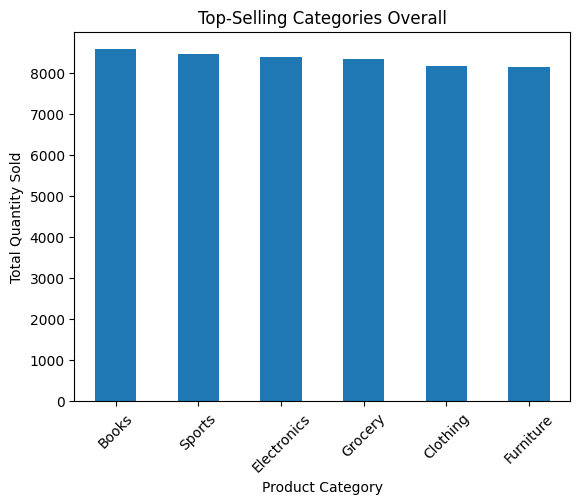

In [34]:
#a. Overall Top-Selling Category (Bar Chart)
import matplotlib.pyplot as plt

top_category_overall.plot(kind='bar', x='product_category', y='qty', legend=False)
plt.title('Top-Selling Categories Overall')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


In [35]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\asus\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


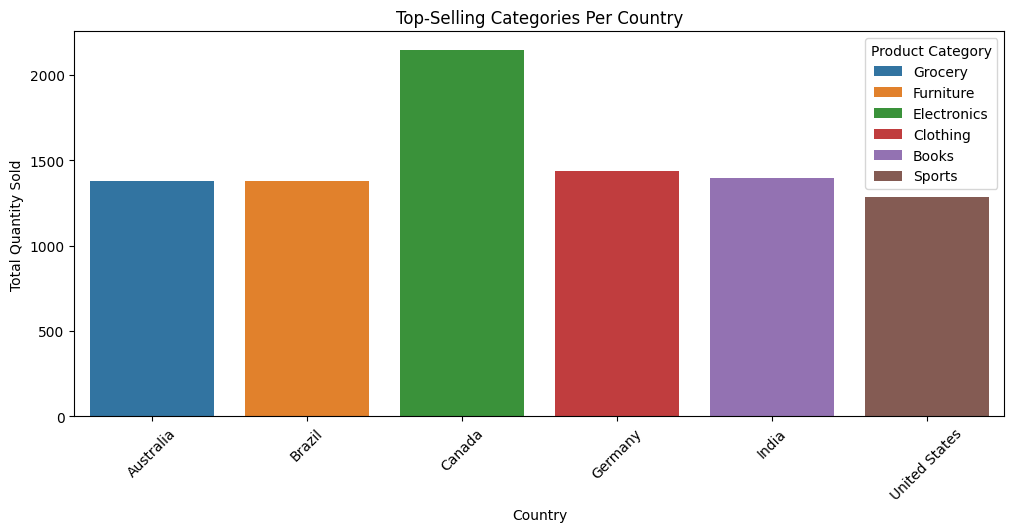

In [38]:
#b. Top-Selling Category Per Country (Bar Chart)
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x='country', y='qty', hue='product_category', data=top_category_per_country)
plt.title('Top-Selling Categories Per Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()


2. Popularity of Products Throughout the Year (Overall and Per Country)

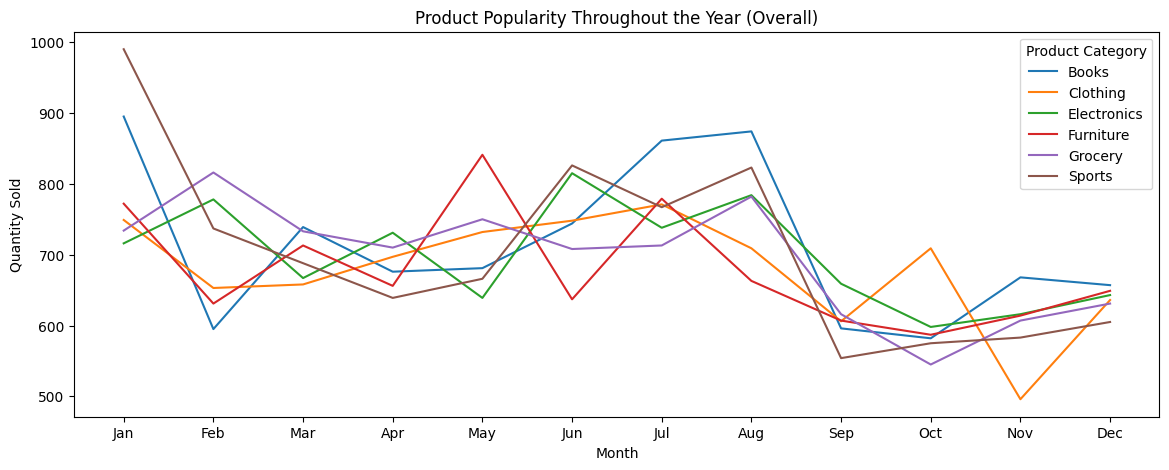

In [39]:
#Line Chart for Overall Product Popularity Throughout the Year
product_popularity_overall.plot(kind='line', figsize=(14, 5))
plt.title('Product Popularity Throughout the Year (Overall)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category')
plt.show()


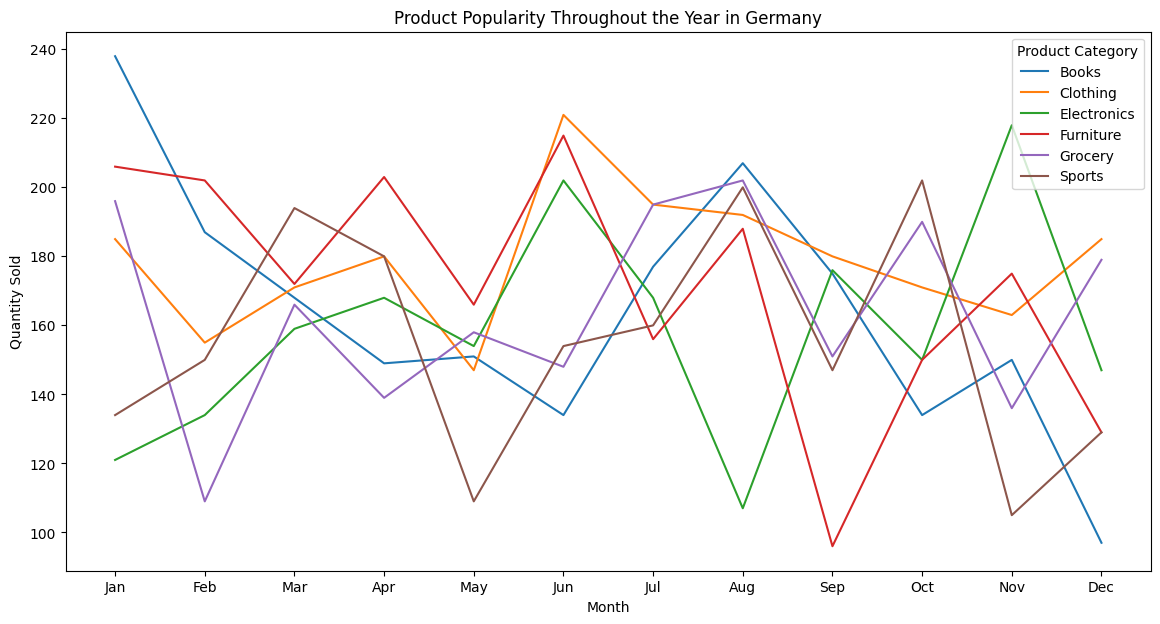

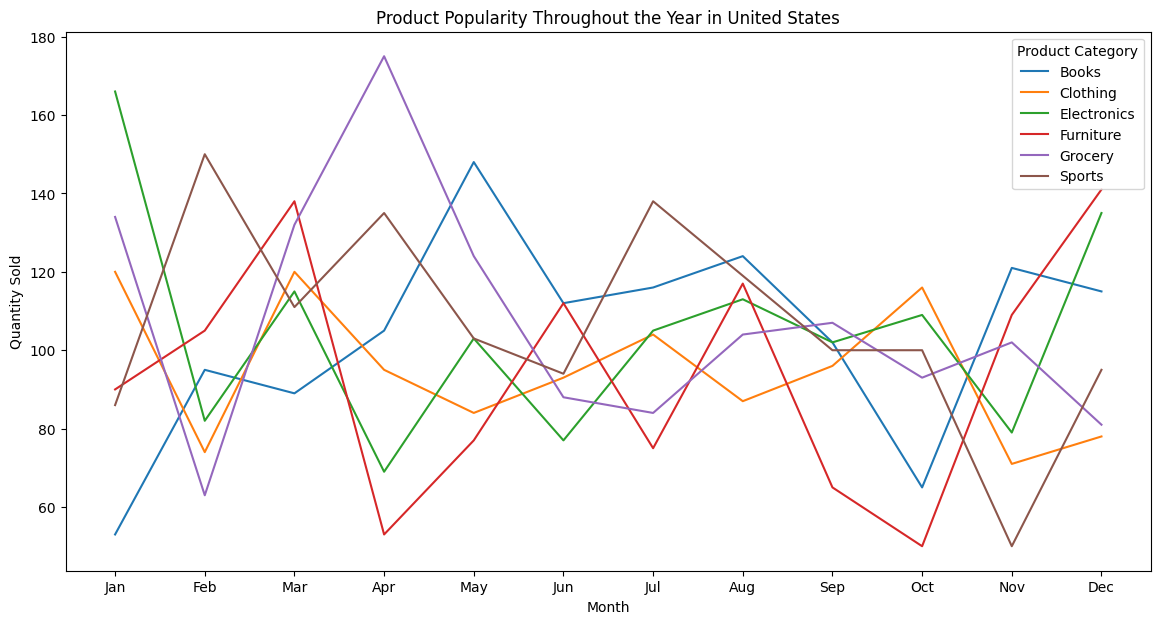

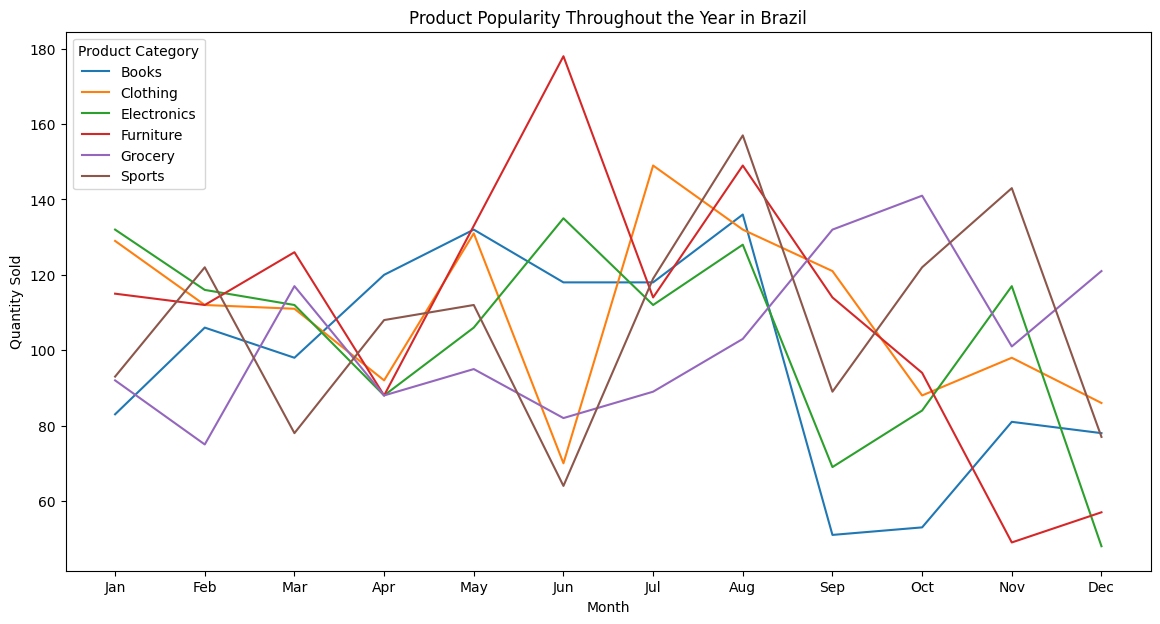

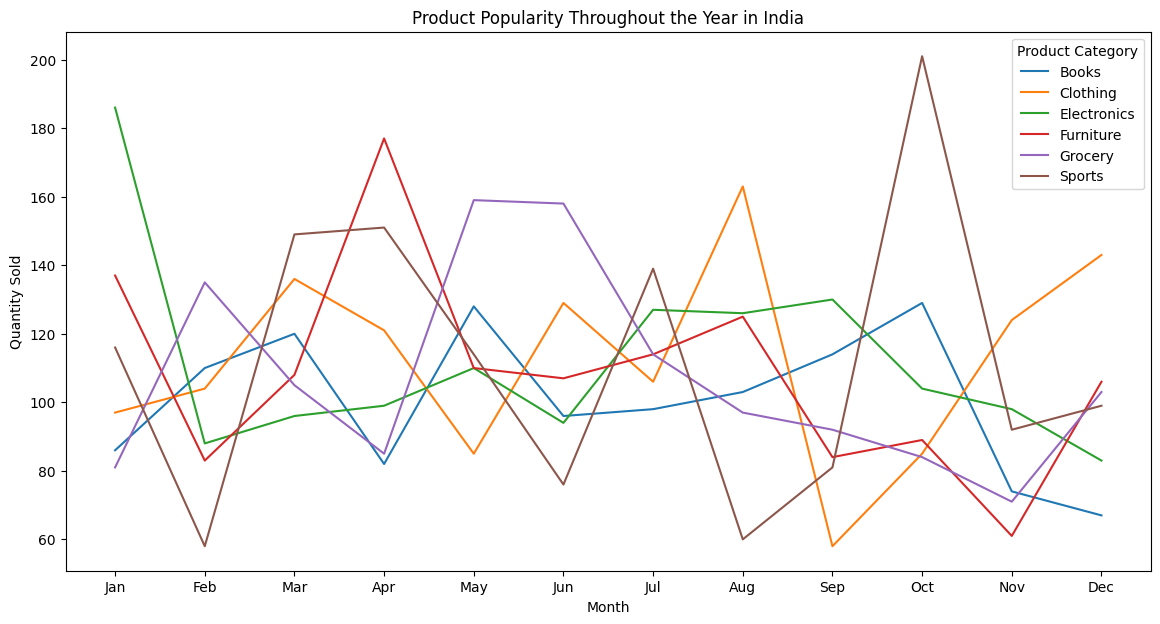

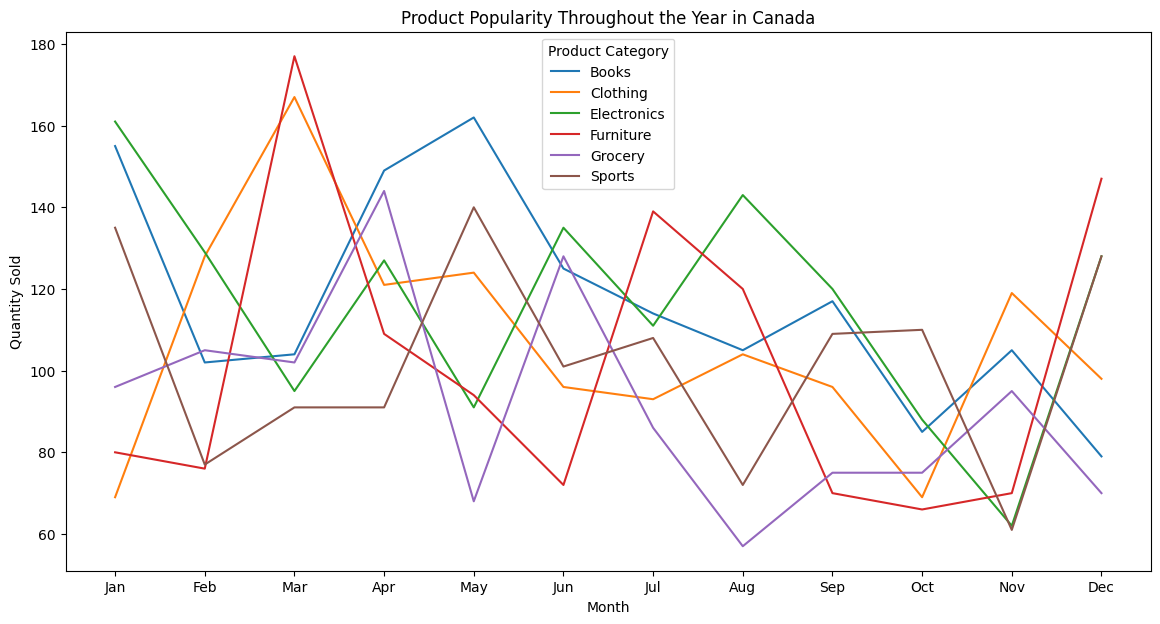

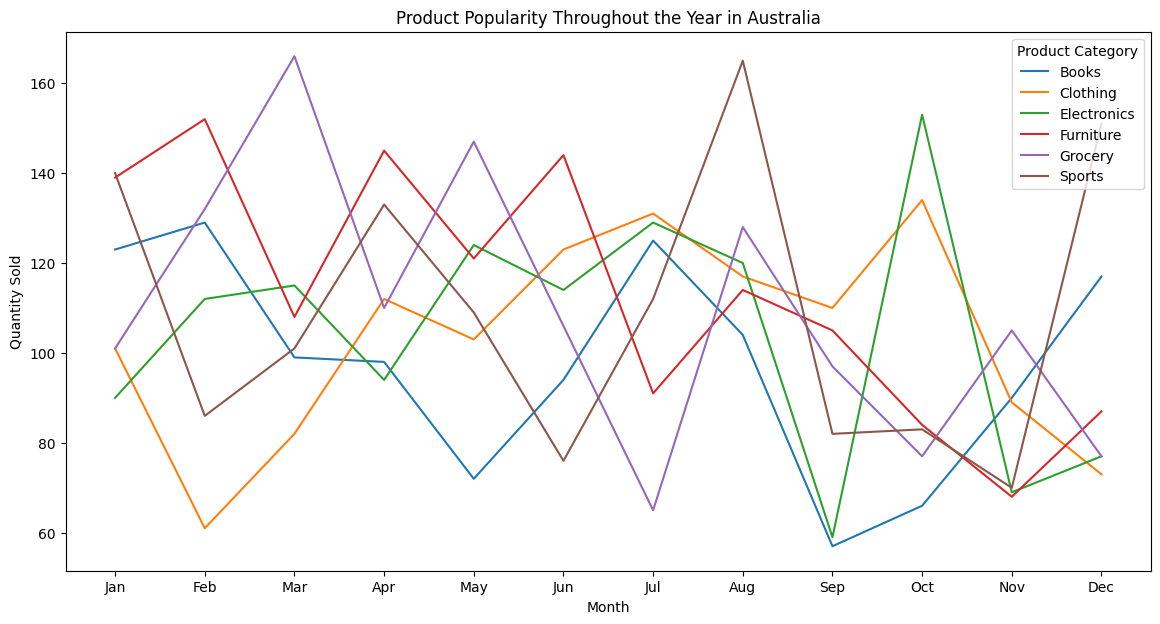

In [35]:
#Line Chart for Product Popularity Per Country
for country in df['country'].unique():
    df_country = df[df['country'] == country]
    product_popularity = df_country.groupby(['month', 'product_category'])['qty'].sum().unstack().fillna(0)
    
    product_popularity.plot(kind='line', figsize=(14, 7))
    plt.title(f'Product Popularity Throughout the Year in {country}')
    plt.xlabel('Month')
    plt.ylabel('Quantity Sold')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Product Category')
    plt.show()


3. Locations with the Highest Traffic of Sales

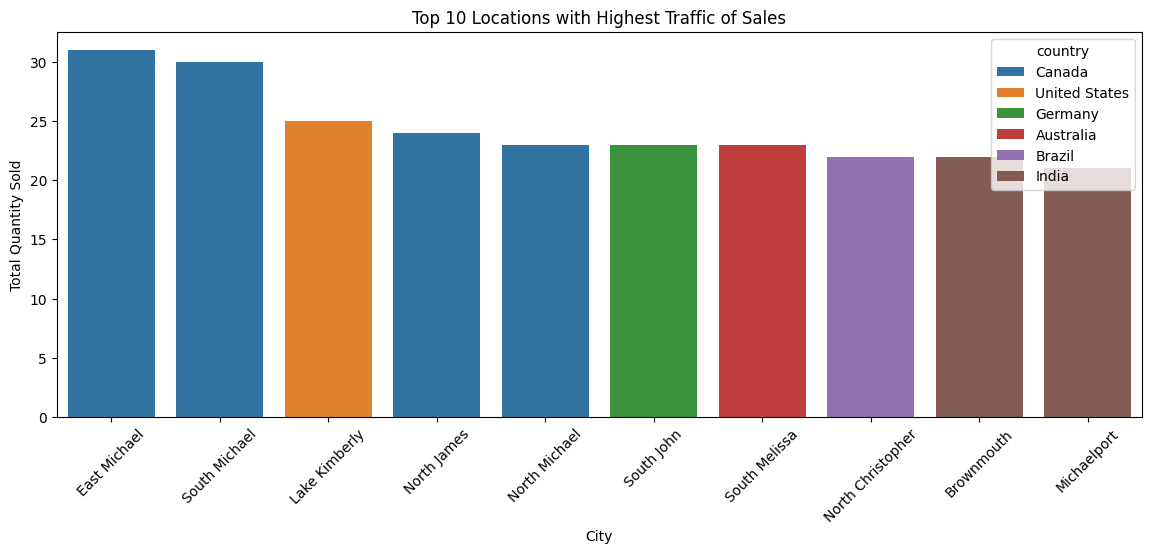

In [40]:
#Bar Chart for Locations with the Highest Traffic of Sales:
top_locations = highest_traffic_locations.head(10)
plt.figure(figsize=(14, 5))
sns.barplot(x='city', y='qty', hue='country', data=top_locations)
plt.title('Top 10 Locations with Highest Traffic of Sales')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


4. Times with the Highest Traffic of Sales (Overall and Per Country)

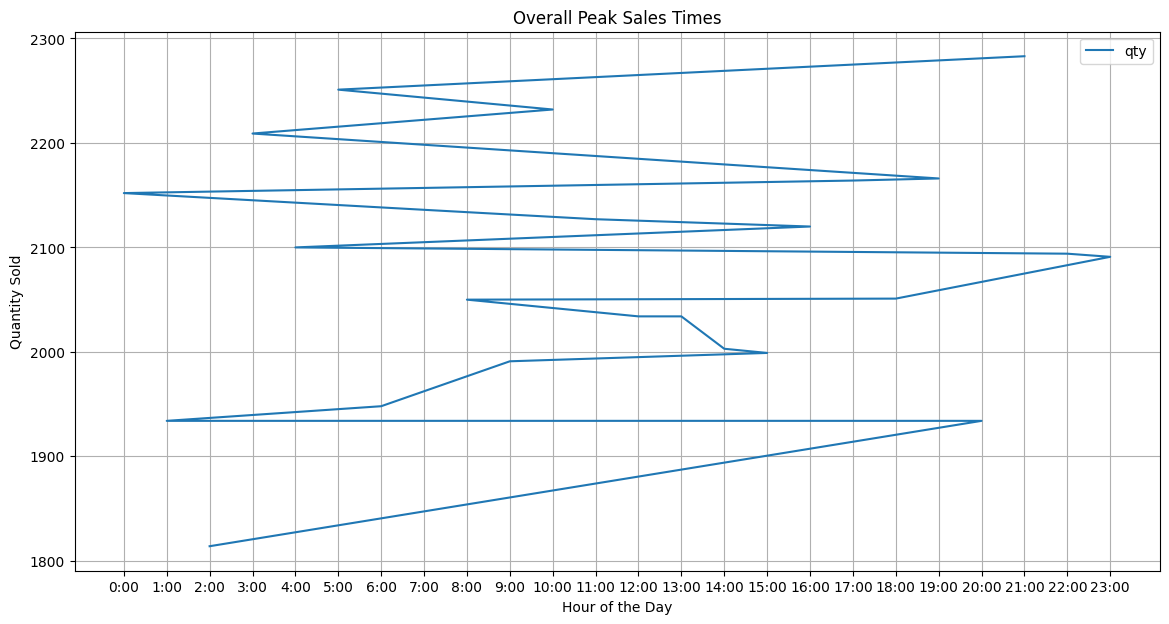

In [40]:

#Line Chart for Overall Peak Sales Times:
peak_times_overall.plot(kind='line', x='hour', y='qty', figsize=(14, 7))
plt.title('Overall Peak Sales Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sold')
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])
plt.grid(True)
plt.show()



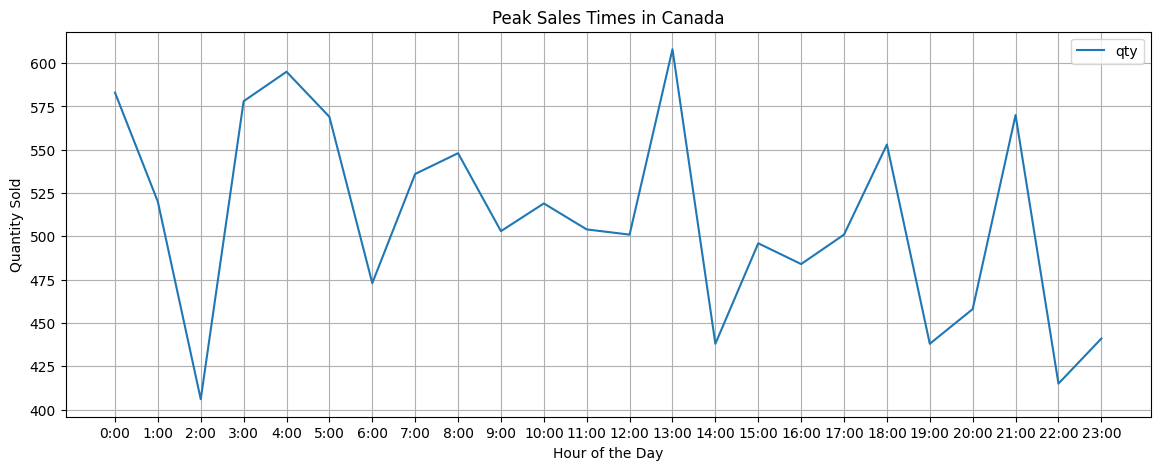

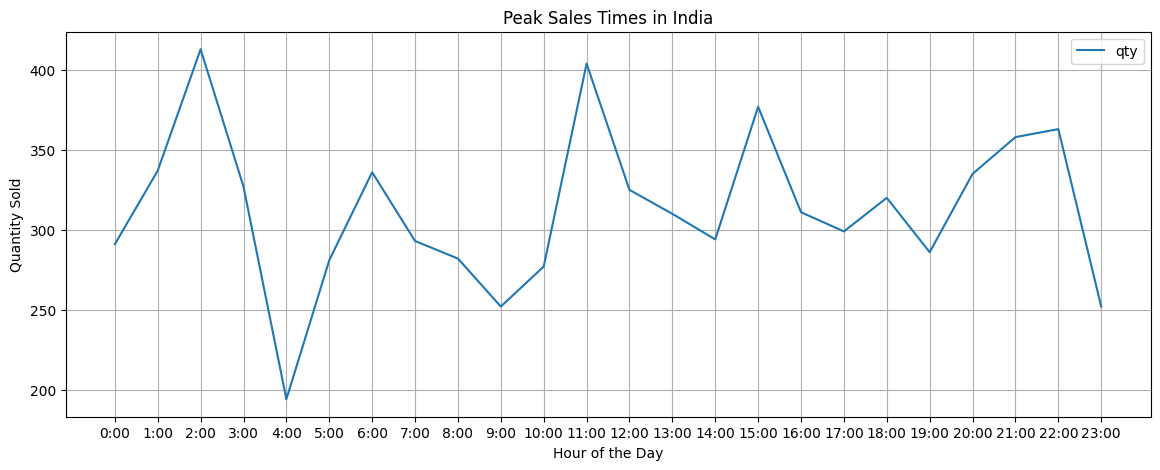

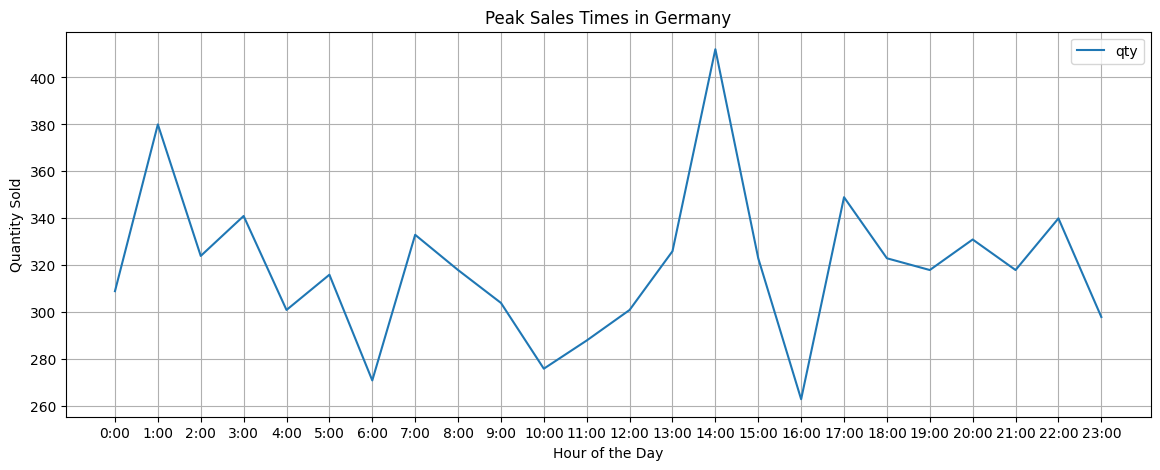

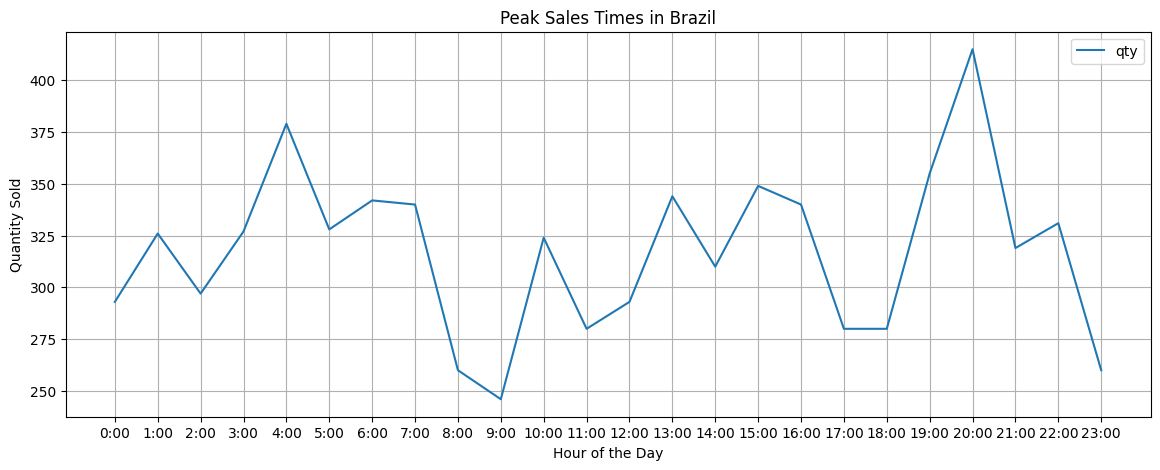

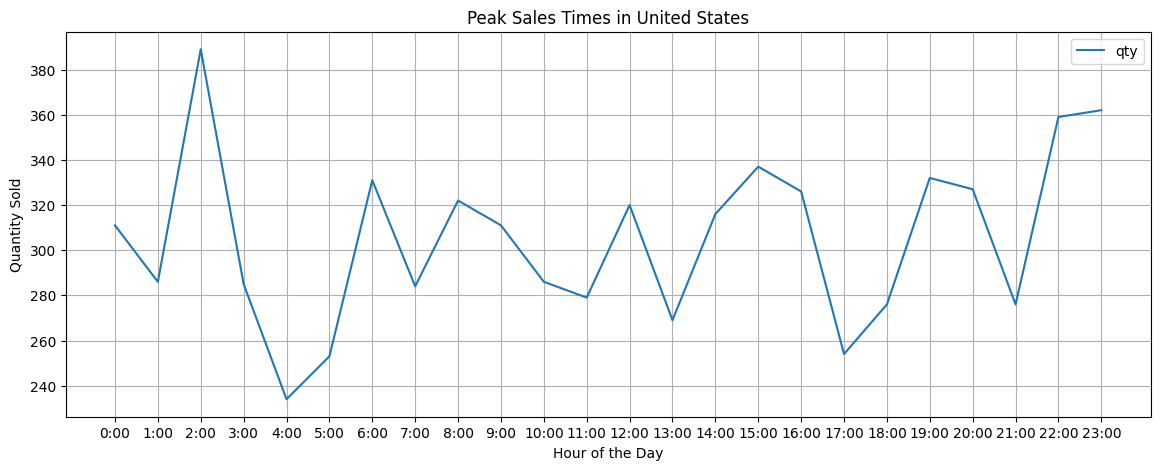

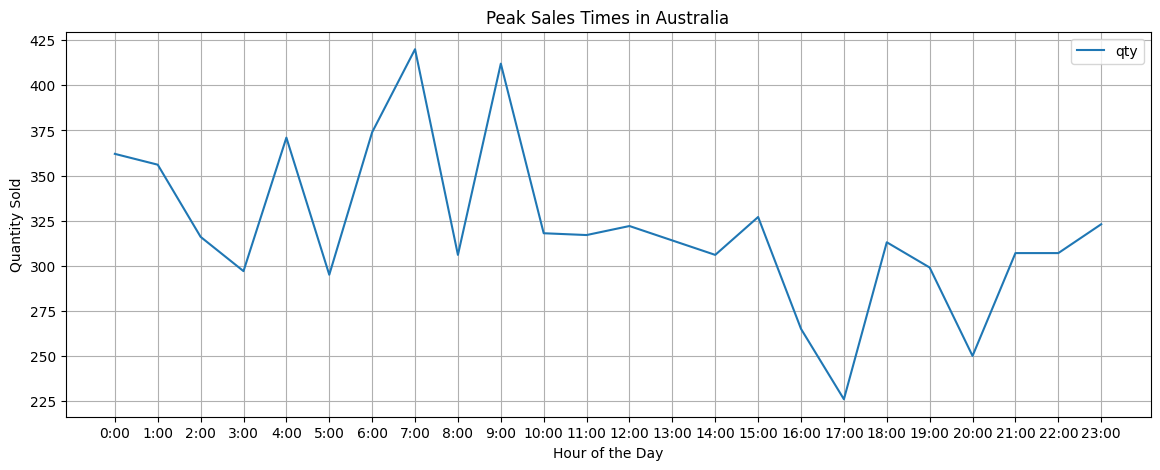

In [41]:
#Line Chart for Peak Sales Times Per Country
for country in df['country'].unique():
    df_country = df[df['country'] == country]
    peak_times = df_country.groupby('hour')['qty'].sum().reset_index()
    
    peak_times.plot(kind='line', x='hour', y='qty', figsize=(14, 5))
    plt.title(f'Peak Sales Times in {country}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Quantity Sold')
    plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])
    plt.grid(True)
    plt.show()
